# Final Project EDA

In [ ]:
# import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
# Set max display cols/rows

# See all columns
pd.set_option('display.max_columns', None)

# See up to 200 rows
pd.set_option('display.max_rows', 200)

In [ ]:
# set up imports from google drive
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# root_dir is the path to your My_Drive folder.
root_dir = "/content/drive/My Drive/"

# i'm storing the data folder in the Colab Notebooks directory at the top level of the Google Drive
data_folder = root_dir + "Colab Notebooks/MPP Science Replication Package/Data/"

# change directory to the data folder
os.chdir(data_folder)

In [ ]:
# Read in data
baseline_police = pd.read_csv(data_folder + "police_baseline_all.csv")
full_police = pd.read_csv(data_folder + "police_station_merge.csv")

In [ ]:
baseline_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 54 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   b_uid                                          1950 non-null   int64  
 1   gender                                         1950 non-null   object 
 2   b_pol_impt                                     1950 non-null   bool   
 3   b_thana_impt                                   1950 non-null   bool   
 4   b_wcase                                        1948 non-null   object 
 5   b_effective                                    1943 non-null   object 
 6   b_helpful                                      1947 non-null   object 
 7   b_add_officer                                  1948 non-null   object 
 8   b_add_female                                   1949 non-null   object 
 9   b_female_better                                1947 

In [ ]:
full_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Columns: 149 entries, uid to female_better_change
dtypes: bool(59), float64(62), int64(8), object(20)
memory usage: 812.6+ KB


### Baseline Data preliminary summary statistics

Reminder of number to answer mapping:
- wcase = {'not enough attention':1,'too little attention':1, 'enough attention':2, 'too much attention':3}
- effective = {'very ineffective':1, 'ineffective':2, 'neither effective nor ineffective':3, 'effective':4, 'very effective':5}
- false_case = {'very uncommon':1, 'uncommon':2, 'common':3, 'very common':4}
- helpful = {'very unhelpful':1, 'unhelpful':2, 'neither helpful nor unhelpful':3, 'helpful':4, 'very helpful':5}
- add_officer = {'much less effective':1, 'less effective':2, 'no difference':3, 'more effective':4, 'much more effective':5}
- add_female = {'much less effective':5, 'less effective':4, 'no difference':3, 'more effective':2, 'much more effective':1}
- female_better = {'male':1, 'no difference':2, 'female':3}
- taken_seriously = {'strongly disagree':1, 'disagree':2, 'agree':3, 'strongly agree':4}
- prof_dev = {'strongly disagree':1, 'disagree':2, 'agree':3, 'strongly agree':4}
- work_help = {'strongly disagree':1, 'disagree':2, 'agree':3, 'strongly agree':4}

In [ ]:
# get list of columns with possible numeric y variables
baseline_nums = ['b_pol_impt', 'b_thana_impt', 'b_wcase_num', 'b_effective_num', 'b_helpful_num', 'b_add_officer_num', 'b_add_female_num', 'b_female_better_num', 'b_sensitivity']
baseline_police[baseline_nums].describe()

,b_wcase_num,b_effective_num,b_helpful_num,b_add_officer_num,b_add_female_num,b_female_better_num,b_sensitivity
count,1948.000000,1943.000000,1947.000000,1948.000000,1949.000000,1947.000000,1945.00000
mean,2.675051,4.592898,4.600924,4.433265,4.526937,2.712892,7.03856
std,0.482518,0.569108,0.551052,0.627369,0.670528,0.601688,2.45181
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,2.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.00000
50%,3.000000,5.000000,5.000000,4.000000,5.000000,3.000000,7.00000
75%,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,8.00000
max,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,16.00000


In [ ]:
baseline_police['gender'].value_counts()

,count
gender,
m,1713
f,237


In [ ]:
# Look at bar charts of baseline perception variables
# Look at proportions to make easier to interpret
def bar_chart(df, var):
  props = df[var].value_counts(normalize=True).reset_index()
  _ = plt.bar(props[var], props['proportion'])
  _ = plt.xlabel(var)
  _ = plt.ylabel("Proportion of Officers")
  plt.show()

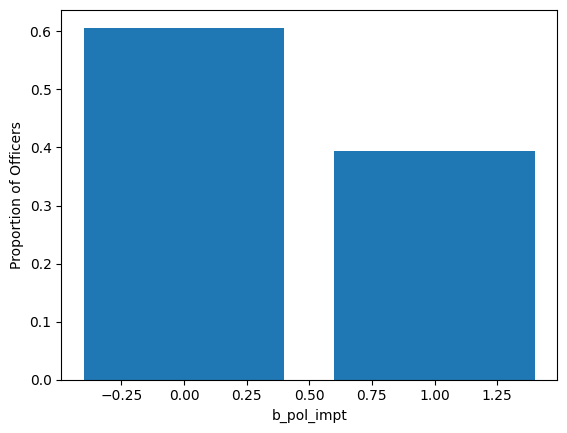

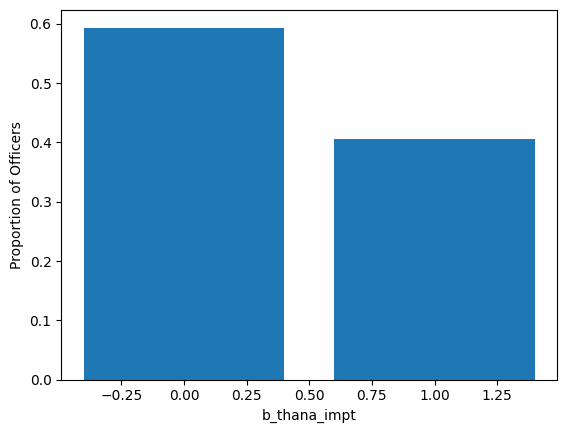

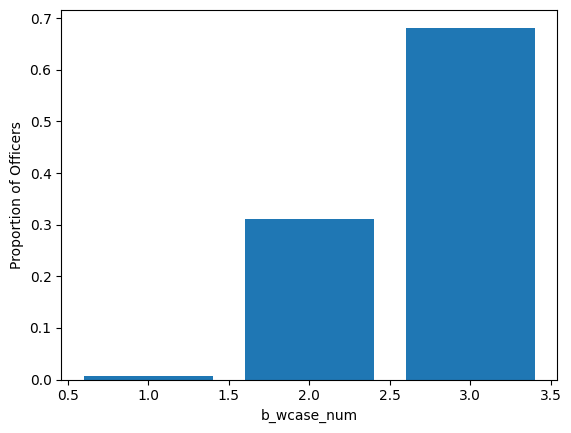

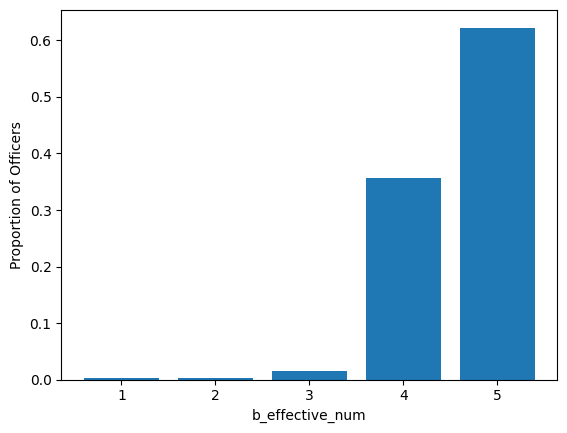

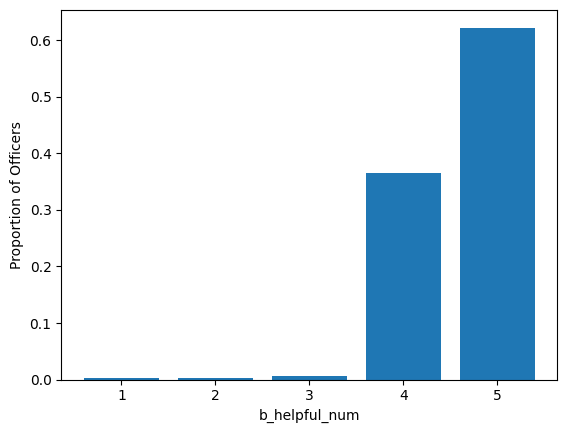

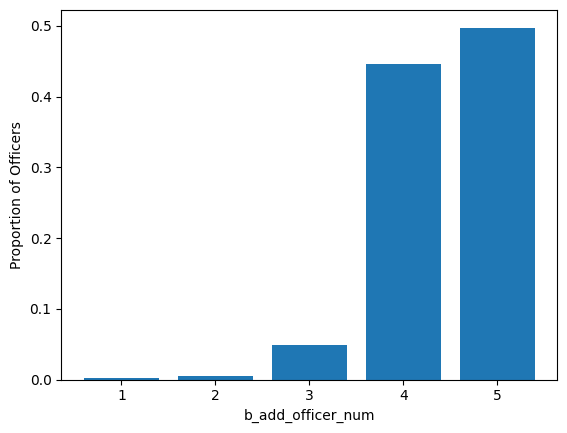

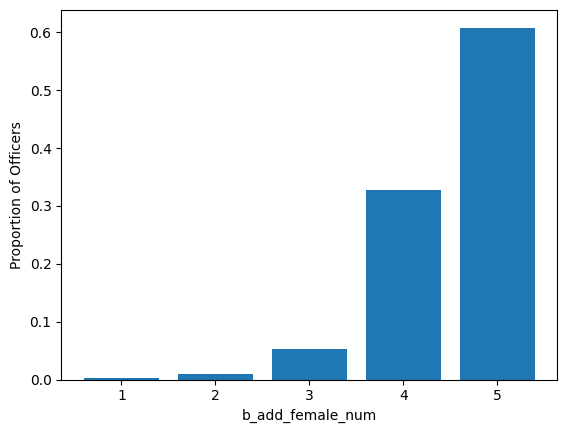

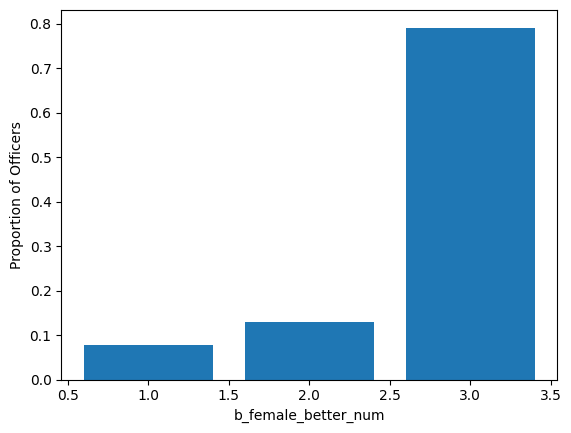

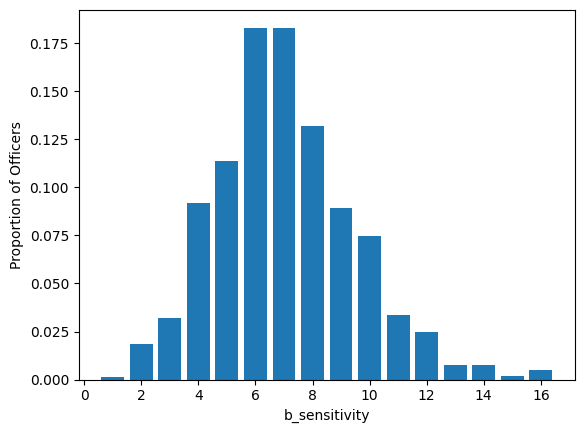

In [ ]:
# Look at bar charts of baseline perception variables
# Look at proportions to make easier to interpret
for var in baseline_nums:
  bar_chart(baseline_police, var)

### Summary statistics takeaways
- There are many more male than female police officers in the data(1713 compared to 237)
- Over 50% of officers think police are very effective in handling women's cases, based on the bar chart it looks like less than 5% of officers think they are "neither effective nor ineffective" or any version of ineffective
- Over 50% of officers think police are very helpful
- Over 75% of officers think adding more police officers would make the police more or much more effective in handling womens cases
- Over 75% of officers think adding more FEMALE police officers would make the police less or much less effective in handling womens cases, over 50% think much less effective
- Over 75% of officers think female officers are more effective in handling cases related to women

### Baseline Data Initial Investigation - Look at mean, std, min, max of variables of interest by gender

In [ ]:
baseline_police.groupby('gender')[baseline_nums].agg(['mean', 'std', 'min', 'max']).T.round(2)

gender                           f         m
b_pol_impt          mean  0.725738  0.347344
                    std   0.447086  0.476265
                    min      False     False
                    max       True      True
b_thana_impt        mean  0.468354  0.397548
                    std   0.500054  0.489534
                    min      False     False
                    max       True      True
b_wcase_num         mean  2.628692  2.681473
                    std   0.501375  0.479646
                    min        1.0       1.0
                    max        3.0       3.0
b_effective_num     mean  4.601695  4.591681
                    std   0.540131  0.573139
                    min        2.0       1.0
                    max        5.0       5.0
b_helpful_num       mean  4.533898  4.610169
                    std   0.593327  0.544501
                    min        1.0       1.0
                    max        5.0       5.0
b_add_officer_num   mean  4.388186  4.439509
                    std   0.625337  0.627577
                    min        2.0       1.0
                    max        5.0       5.0
b_add_female_num    mean  4.637131  4.511682
                    std   0.523973  0.687097
                    min        3.0       1.0
                    max        5.0       5.0
b_female_better_num mean  2.797468   2.70117
                    std   0.470658  0.616858
                    min        1.0       1.0
                    max        3.0       3.0
b_sensitivity       mean  7.468085  6.979532
                    std   2.577442  2.428893
                    min        1.0       1.0
                    max       16.0      16.0

### First thoughts:
- largest difference between male and female officers seems to be in the perceptions of tasks most important to the officer, females are true much more often than males (this means female officers listed pursuing cases related to women as one of the activites most important to them more often in the baseline survey)
- no female officers said adding female officers would be more effective or much more effective


### Further investigate relationship with gender by creating visualizations for the variables of interest

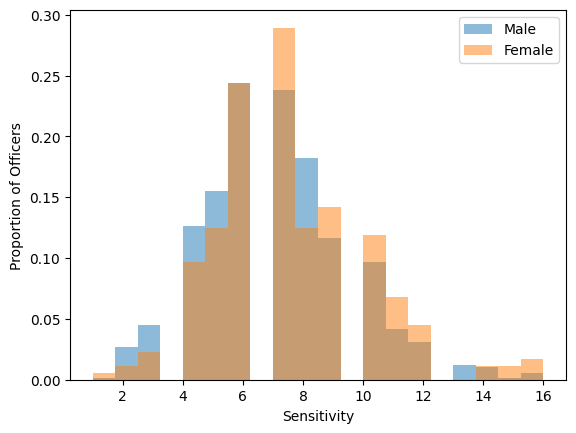

In [ ]:
# Look at histogram of sensitivity by gender
male = baseline_police[baseline_police['gender']=='m']
female = baseline_police[baseline_police['gender']=='f']

_ = plt.hist(male['b_sensitivity'], alpha = 0.5, label = "Male", density=True, bins=20)
_ = plt.hist(female['b_sensitivity'], alpha = 0.5, label = 'Female', density=True, bins=20)

_ = plt.xlabel("Sensitivity")
_ = plt.ylabel("Proportion of Officers")
_ = plt.legend()

In [ ]:
# Look at bar charts of numerical values - separated by gender
def gender_clustered_bar(col):
  percents = baseline_police.groupby('gender')[col].value_counts(normalize=True).reset_index()
  g = sns.catplot(
    data=percents, kind="bar",
    x=col, y="proportion", hue="gender"
)
  _ = plt.xlabel(col)
  _ = plt.ylabel("# Officers at Baseline")
  _ = plt.legend()

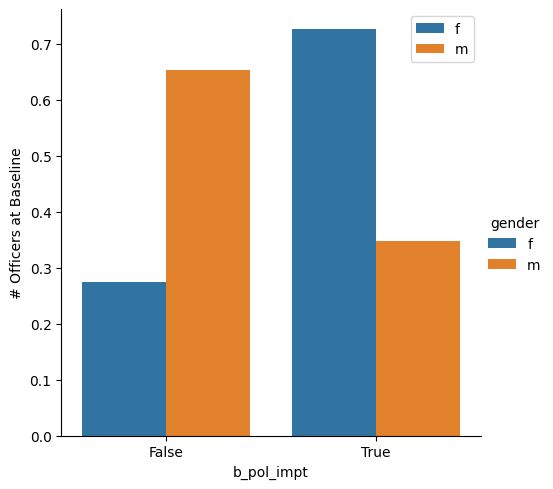

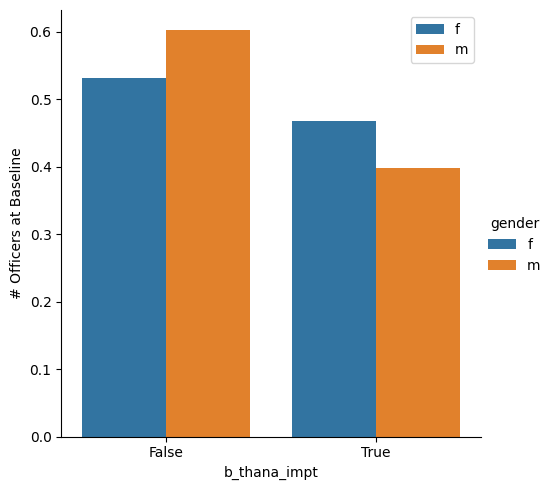

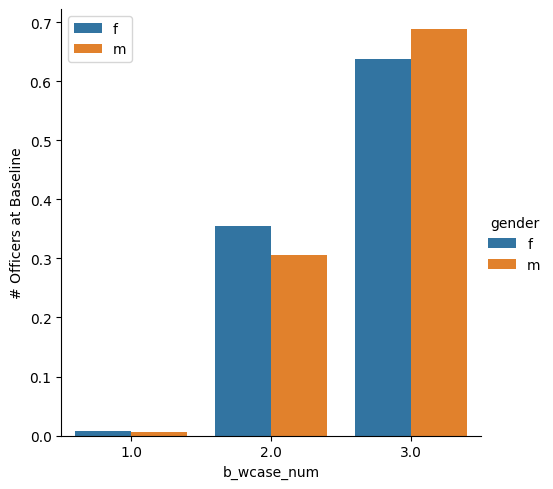

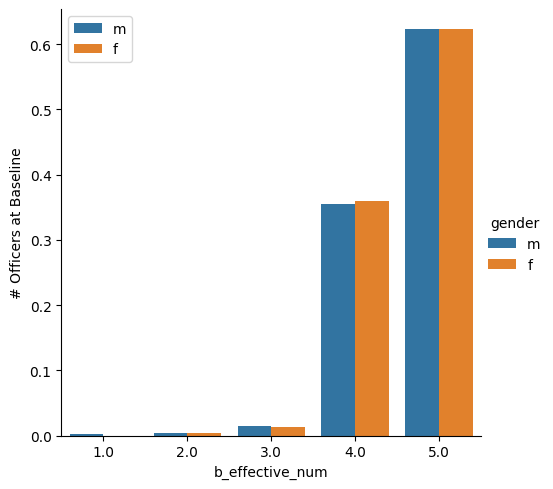

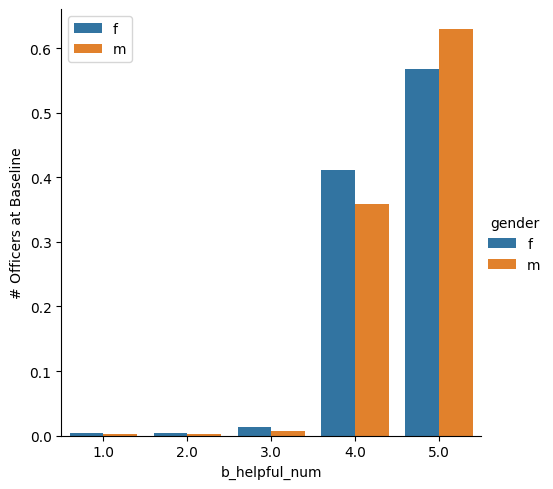

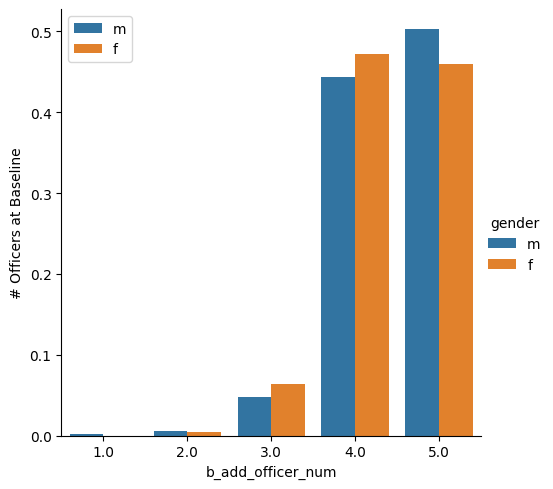

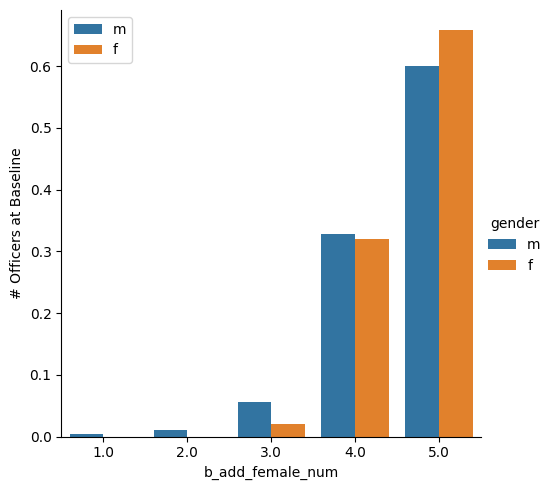

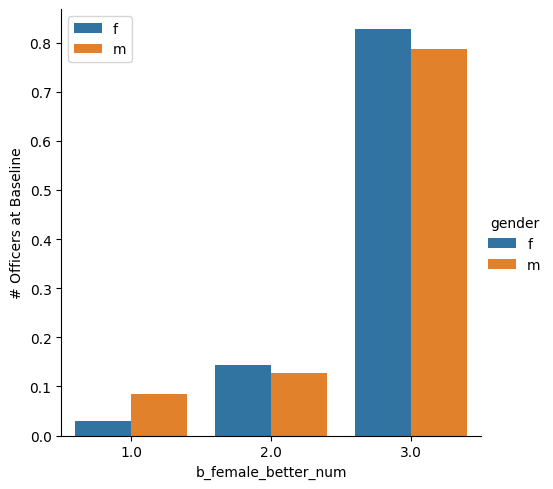

In [ ]:
for col in baseline_nums:
  if col != 'b_sensitivity':
   gender_clustered_bar(col)

### Observations from visualizations:
- Distribution of interpretation of officers effectiveness is very similar between genders
- Females seem to have a slightly higher interpretation of police's sensitivity in dealing with cases related to women

## Full dataset initial summary statistics

In [ ]:
# Difference from baseline to endline are main variables of interest
difference_vars = ['wcase_change','effective_change','helpful_change','add_officer_change','add_female_change','female_better_change']
full_police[difference_vars].describe()

,wcase_change,effective_change,helpful_change,add_officer_change,add_female_change,female_better_change
count,1059.000000,1062.000000,1065.000000,1064.000000,1065.000000,1064.000000
mean,0.037771,-0.049906,0.025352,0.209586,-0.918310,-0.007519
std,0.605964,0.718908,0.691187,0.785728,0.794656,0.734796
min,-2.000000,-4.000000,-3.000000,-3.000000,-3.000000,-2.000000
25%,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
max,2.000000,4.000000,4.000000,4.000000,3.000000,2.000000


In [ ]:
# Potential explanatory variables
explanatory_vars = ['urban', 'treatment', 'group', 'e_male_weight', 'gender']
full_police[explanatory_vars].describe(include=['object', 'float'])

,urban,treatment,group,e_male_weight,gender
count,1068,1068,1068,1068.000000,1068
unique,2,2,3,NaN,2
top,Rural,Treatment,women officers,NaN,male
freq,558,729,372,NaN,946
mean,NaN,NaN,NaN,4.977810,NaN
std,NaN,NaN,NaN,2.275685,NaN
min,NaN,NaN,NaN,1.500000,NaN
25%,NaN,NaN,NaN,3.090909,NaN
50%,NaN,NaN,NaN,4.818182,NaN
75%,NaN,NaN,NaN,6.454546,NaN


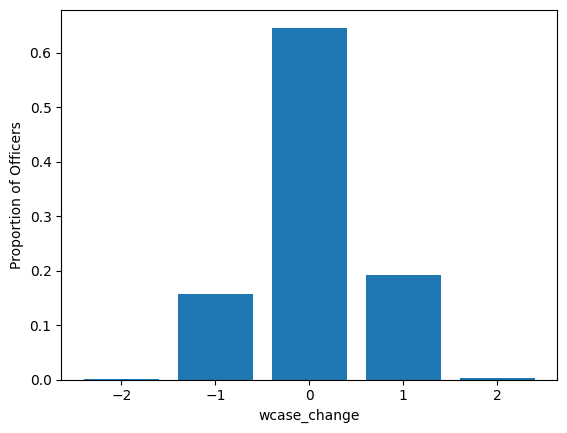

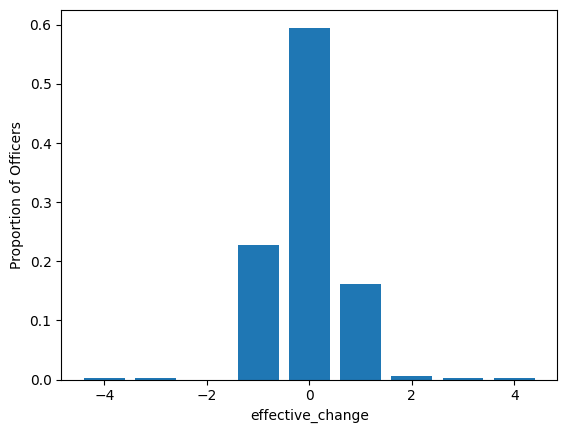

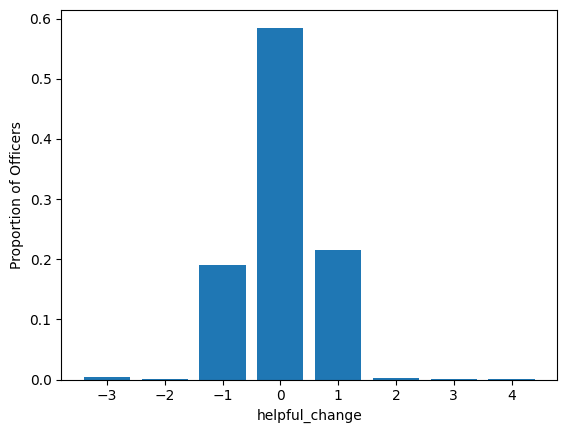

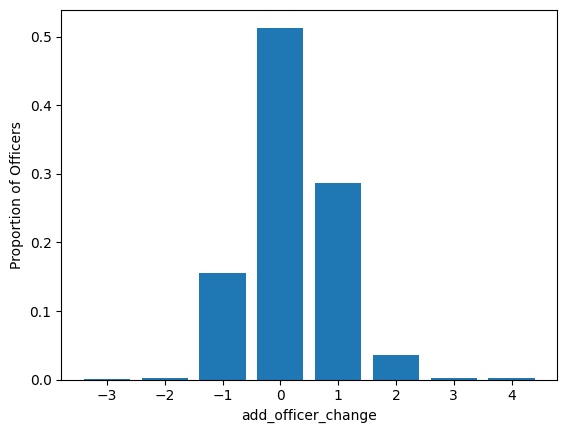

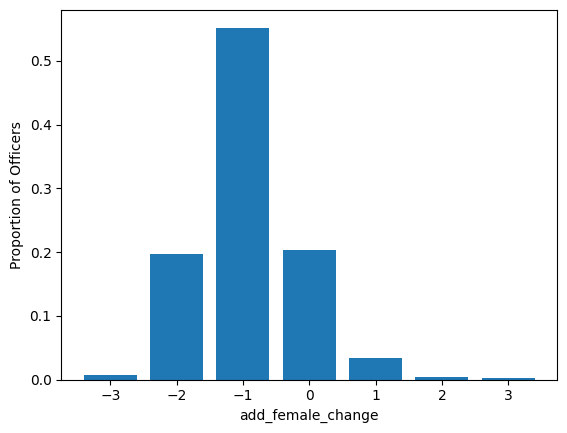

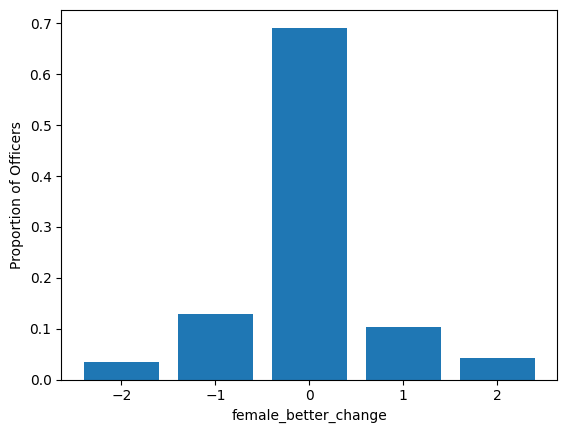

In [ ]:
for dif in difference_vars:
  bar_chart(full_police, dif)

### Initial takeaways from summary statistics:
- for wcase, effectiveness, helpfulness, and female officers better, at least 75% of officers surveyed had no change in their response from baseline to endline
- perception of adding a female officer seems to have had the most changes, at baseline most officers thought adding female police officers would be less effective

### Dig deeper into perception of adding a female officer

In [ ]:
add_female = full_police.groupby(['orig_b_add_female'])['e_add_female'].value_counts().reset_index()
add_female = add_female.pivot(index='orig_b_add_female', columns='e_add_female', values='count')
add_female

e_add_female,Less effective,More Effective,No difference
orig_b_add_female,,,
less effective,194.0,3.0,138.0
more effective,4.0,NaN,4.0
much less effective,449.0,8.0,206.0
much more effective,2.0,1.0,1.0
no difference,31.0,1.0,23.0


<Axes: xlabel='e_add_female', ylabel='orig_b_add_female'>

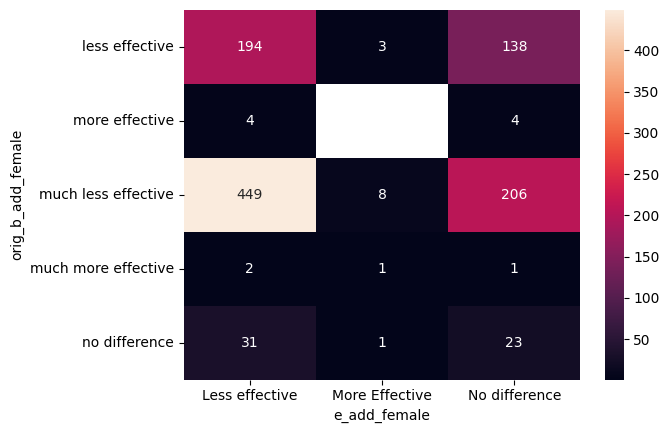

In [ ]:
sns.heatmap(add_female, annot=True, fmt=".0f")

### Big takeaway/Further Investigation needed: interesting that endline only had 3 responses given
- examining surveys: both baseline and endline surveys have all 5 options presented
- at baseline much less effective was the category with the most values, would be very interesting if at endline there was not a single officer who responded with that
- despite the surveys looking the same, I do not feel 100% confident in the accuracy of comparing this endline vs baseline data but will continue to explore it

### Instead going to explore perception of police effectiveness

In [ ]:
effectiveness = full_police.groupby(['orig_b_effective'])['e_effective'].value_counts().reset_index()
effectiveness = effectiveness.pivot(index='orig_b_effective', columns='e_effective', values='count')
effectiveness

e_effective,effective,ineffective,very effective,very ineffective
orig_b_effective,,,,
effective,183.0,NaN,168.0,NaN
ineffective,1.0,NaN,1.0,NaN
neither effective nor ineffective,4.0,1.0,6.0,NaN
very effective,241.0,2.0,449.0,2.0
very ineffective,2.0,NaN,2.0,NaN


<Axes: xlabel='e_effective', ylabel='orig_b_effective'>

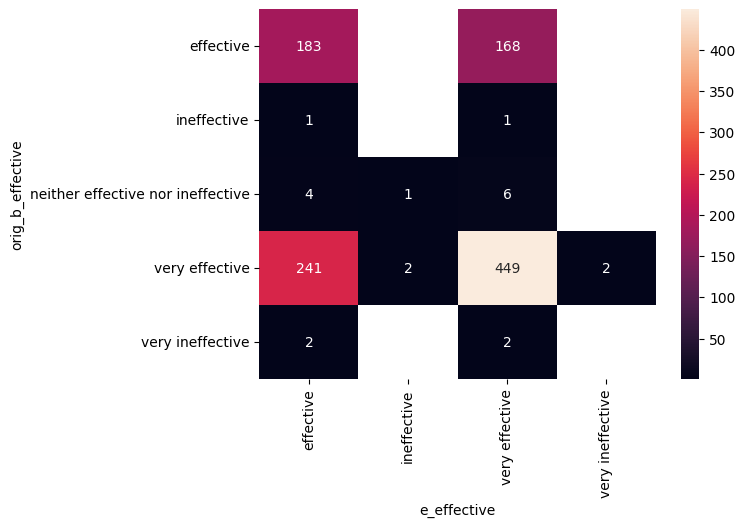

In [ ]:
sns.heatmap(effectiveness, annot=True, fmt=".0f")

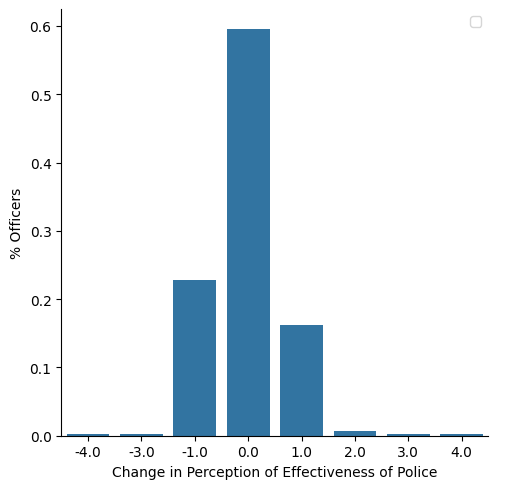

In [ ]:
percents = full_police['effective_change'].value_counts(normalize=True).reset_index()
g = sns.catplot(
    data=percents, kind="bar",
    x='effective_change', y="proportion"
)
_ = plt.xlabel("Change in Perception of Effectiveness of Police")
_ = plt.ylabel("% Officers")
_ = plt.legend()

### Initial takeaways about change in perception of effectiveness of police
- about 60% of officers had no change in their perception from baseline to endline
- about 25% of officers had a slight decrease in their perception of effectiveness (ex: very effective to effective, or ineffective to very ineffective)
- from the heatmap we can see majority of the decreases are very effective to effective, and most of the increases are effective to very effective

### Investigate if any of the possible explanatory variables have a relationship with the change in perception of effectiveness

In [ ]:
# Look at bar charts of effectiveness by possible explanatory variables
def clustered_bar_eff(expl_var):
  percents = full_police.groupby(expl_var)['effective_change'].value_counts(normalize=True).reset_index()
  g = sns.catplot(
    data=percents, kind="bar",
    x='effective_change', y="proportion", hue=expl_var
)
  _ = plt.xlabel("Change in Perception of Effectiveness of Police")
  _ = plt.ylabel("% of Officers")
  _ = plt.legend()

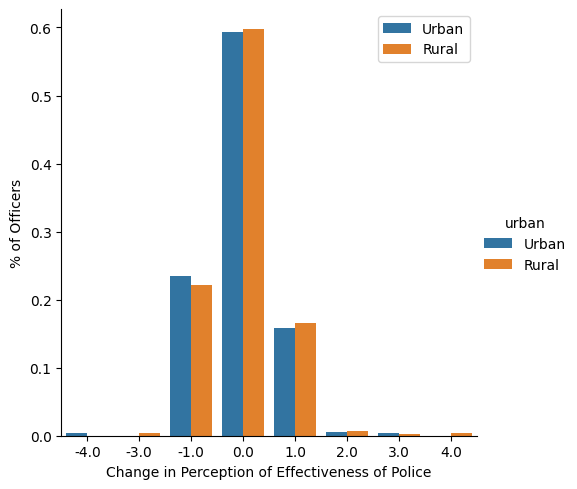

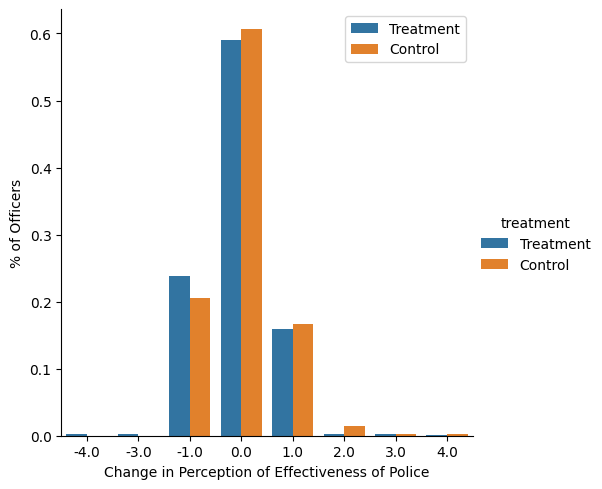

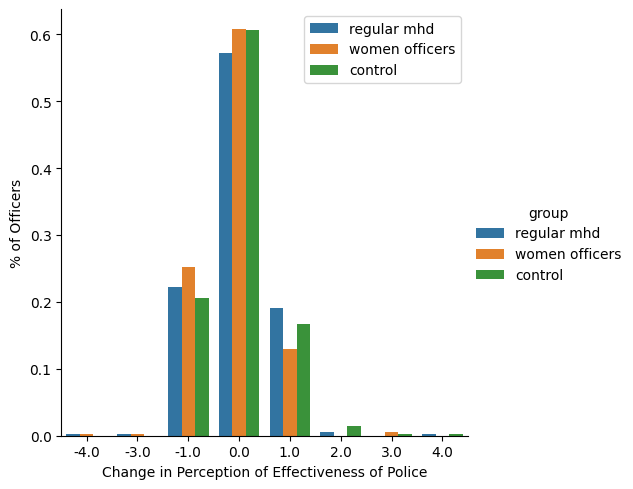

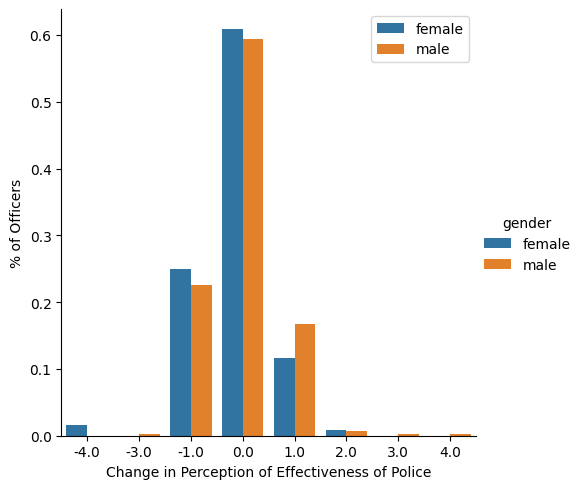

In [ ]:
for var in explanatory_vars:
  if var != 'e_male_weight':
    clustered_bar_eff(var)

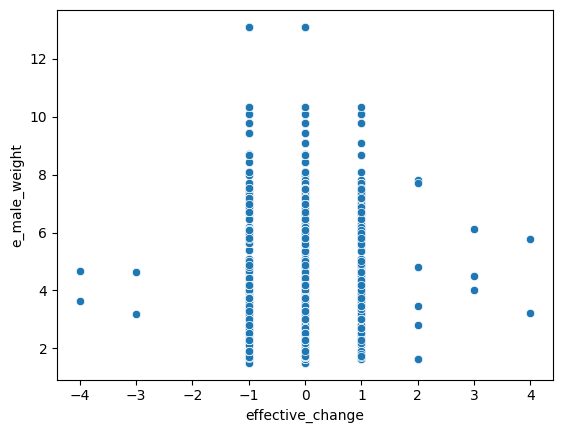

In [ ]:
sns.scatterplot(data=full_police, x='effective_change', y='e_male_weight')
plt.show()

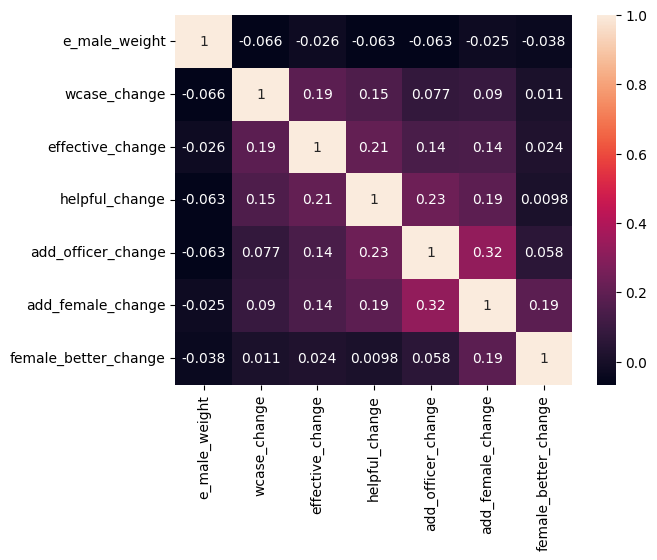

In [ ]:
# calculate correlation of e_male_weight and changes
correlations = full_police[['e_male_weight'] + difference_vars].corr()
_ = sns.heatmap(correlations, annot=True)

### Takeways:
- none of these possible explanatory variables seem to have a strong relationship with change in perception of effectiveness as the pattern seems to be similar amongst all groups
- treatment has slightly more officers with a negative change
- specifically, women run whds seem to lean more towards a slight negative change than regular whds and control, although the overall patter is the same with no change being the highest
- male officers had slightly more positive change in perception of effectiveness than female officers
- the weight of male officers in a station at endline does not have a high correlation with any of the change variables

### Investigate treatment effect
Original question is if treatment has an effect on any change in these officer perceptions

In [ ]:
# Look at bar charts of numerical values - separated by gender
def treatment_clustered_bar(dif):
  percents = full_police.groupby('treatment')[col].value_counts(normalize=True).reset_index()
  g = sns.catplot(
    data=percents, kind="bar",
    x=dif, y="proportion", hue='treatment'
)
  _ = plt.xlabel(dif)
  _ = plt.ylabel("% of Officers")
  _ = plt.legend()

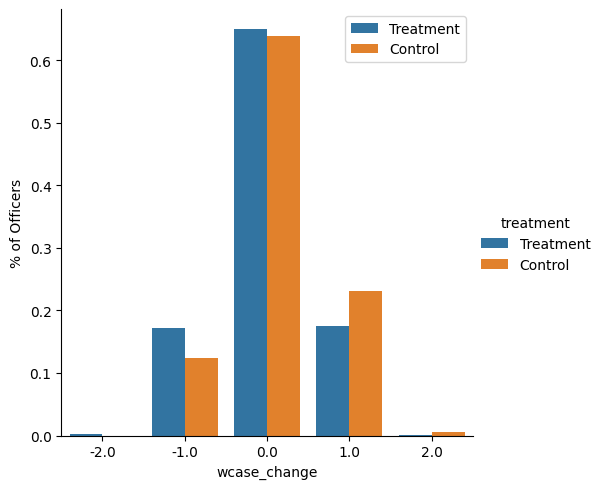

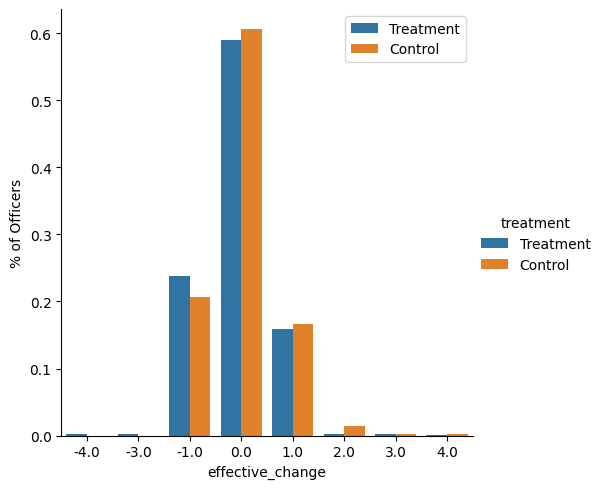

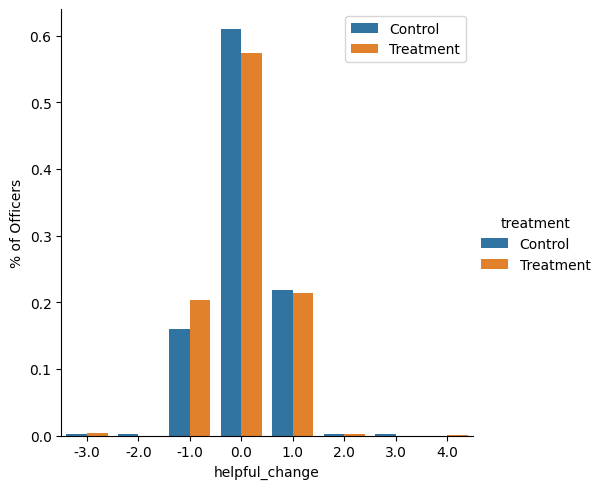

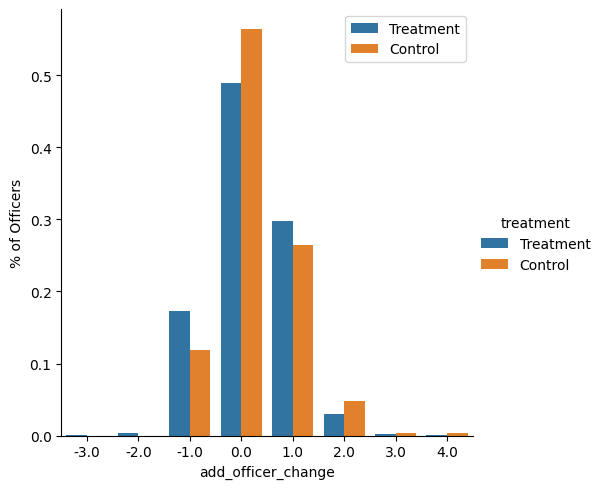

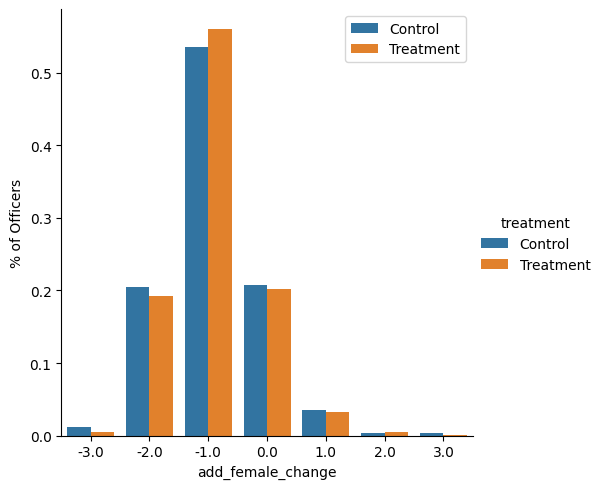

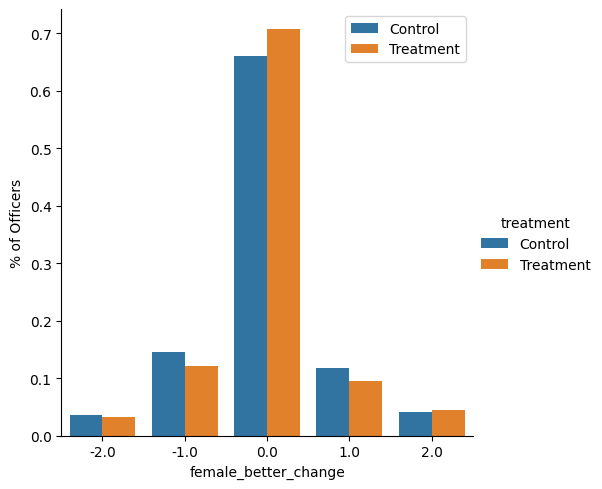

In [ ]:
for dif in difference_vars:
    treatment_clustered_bar(dif)

### Takeaways
- Treatment may have a slight negative effect on perception of police's attention to women's cases, perception of effectiveness of adding more officers, and perception of helpfulness of officers
- Does not seem super strong - will have to perform further tests

### Test performing a super simple linear regression with wcase change as the y variable and treatment, gender, and e_male_weight as the x variables

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import preprocessing

In [ ]:
# set wcase change equal to the data in the wcase_change column
# Drop any nulls as temp measure
wcase_change = pd.DataFrame(full_police[~full_police['wcase_change'].isnull()]['wcase_change'])

# set x_vars
# First make treatment and gender numerical
full_police['treatment_'] = full_police['treatment'].map({'Treatment':1, 'Control':0})
full_police['gender_'] = full_police['gender'].map({'female':1, 'male':0})

X = pd.DataFrame(full_police[~full_police['wcase_change'].isnull()][['treatment_', 'gender_', 'e_male_weight']])


In [ ]:
# split the data into training and test sets
wcase_train, wcase_test, X_train, X_test = train_test_split(wcase_change, X, test_size=0.3, random_state=16)

In [ ]:
# making the linear regression model

# 1. initialize a LinearRegression model
model = LinearRegression()

# 2. fit the model on the training data
model.fit(X_train, wcase_train)     # fill in training variables for the arguments

# 3. call predict with the flipper_length test data
wcase_predictions = model.predict(X_test)# call model with argument here



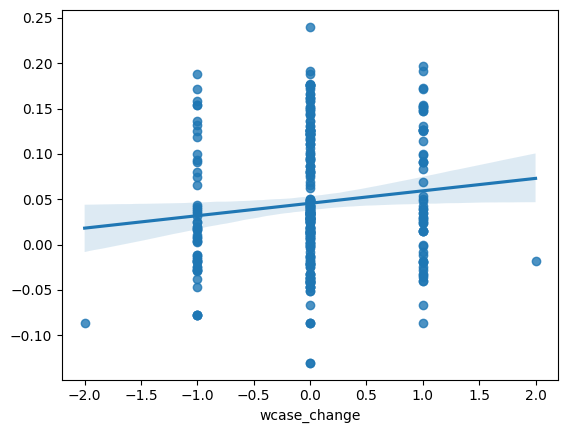

In [ ]:
_ = sns.regplot(x=wcase_test,
            y=wcase_predictions)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

r_squared_train = round(model.score(X_train, wcase_train) * 100)
r_squared_test = round(model.score(X_test, wcase_test) * 100)
r_squared_predictions = round(r2_score(wcase_test, wcase_predictions) * 100)
mae = round(mean_absolute_error(wcase_test, wcase_predictions))


print(f"Training Data R-squared: {r_squared_train}%")
print(f"Test Data R-squared: {r_squared_test}%")
print(f"The model's R-squared score: {r_squared_predictions}%")
print(f"Mean Absolute Error: {mae}g")

Training Data R-squared: 1%
Test Data R-squared: 1%
The model's R-squared score: 1%
Mean Absolute Error: 0g
